# <span style="color:#a96567"> Exploratory Data Analysis for Youtube Comments </span>

In [34]:
import numpy as np # linear algebra
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline
from PIL import Image
from subprocess import check_output
from wordcloud import WordCloud, STOPWORDS
import seaborn as sns
sns.set(color_codes=True)

In [2]:
stopwords = set(STOPWORDS)
data = pd.read_csv("./Data Sets/train.csv")
circle_mask = np.array(Image.open("./circle.png"))

## <span style="color:#00C853"> 1. Word Cloud </span>

In [3]:
Advertisements=data[data["CLASS"]==1]["CONTENT"]
Comments=data[data["CLASS"]==0]["CONTENT"]

### <span style="color:#00C853"> WordCloud for Comments having Advertisements</span>

In [9]:
wordcloud_ads = WordCloud(width=1200, height=400,colormap='magma',mask=circle_mask,background_color="white").generate(str(Advertisements)) 
plt.figure(figsize=(16,12)) 
plt.imshow(wordcloud_ads, interpolation="bilinear") 
plt.axis("off") 
plt.savefig("./wordcloud_adds.png")
plt.close()
# plt.show()

## <center style="color:#a96567">** WordCloud for Advertisements **</center>

<img src="./wordcloud_adds.png" style="height:400px;">

### <span style="color:#00C853"> WordCloud for Comments not having Advertisements</span>

In [11]:
wordcloud_Comments = WordCloud(width=1200, height=400,mask=circle_mask,background_color="white").generate(str(Comments)) 
plt.figure(figsize=(16,12)) 
plt.imshow(wordcloud_Comments,interpolation="bilinear") 
plt.axis("off") 
plt.savefig("./wordcloud_comments.png")
# plt.show()
plt.close()

## <center style="color:#a96567">** WordCloud for Non-Advertising Comments **</center>

<img src="./wordcloud_comments.png" style="height:400px;">

## <span style="color:#00C853"> 2. Plots  </span>

In [14]:
data.DATE=pd.to_datetime(data.DATE)

In [15]:
data.head()

,COMMENT_ID,AUTHOR,DATE,CONTENT,CLASS
0,LZQPQhLyRh80UYxNuaDWhIGQYNQ96IuCg-AYWqNPjpU,Julius NM,2013-11-07 06:20:48,"Huh, anyway check out this you[tube] channel: ...",1
1,z13jhp0bxqncu512g22wvzkasxmvvzjaz04,ElNino Melendez,2013-11-09 08:28:43,me shaking my sexy ass on my channel enjoy ^_^ ﻿,1
2,z13fwbwp1oujthgqj04chlngpvzmtt3r3dw,GsMega,2013-11-10 16:05:38,watch?v=vtaRGgvGtWQ Check this out .﻿,1
3,z13lfzdo5vmdi1cm123te5uz2mqig1brz04,ferleck ferles,2013-11-27 21:39:24,Subscribe to my channel ﻿,1
4,z12avveb4xqiirsix04chxviiljryduwxg0,BeBe Burkey,2013-11-28 16:30:13,and u should.d check my channel and tell me wh...,1


In [43]:
combine_data=data.copy()

In [44]:
combine_data["day_of_week"]=combine_data.DATE.apply(lambda x:x.dayofweek)
combine_data["time_of_day"]=combine_data.DATE.apply(lambda x:x.hour)
combine_data["month"]=combine_data.DATE.apply(lambda x:x.month)
combine_data["year"]=combine_data.DATE.apply(lambda x:x.year)

In [45]:
time_df=combine_data[combine_data.columns[-4:]]

In [46]:
time_df.head()

,day_of_week,time_of_day,month,year
0,3.0,6.0,11.0,2013.0
1,5.0,8.0,11.0,2013.0
2,6.0,16.0,11.0,2013.0
3,2.0,21.0,11.0,2013.0
4,3.0,16.0,11.0,2013.0


In [49]:
print("Count of Null Value Present :")
time_df.isnull().sum()

Count of Null Value Present :


day_of_week    0
time_of_day    0
month          0
year           0
dtype: int64

In [48]:
for col in time_df.columns[-4:]:
    time_df.fillna(value={col:99},inplace=True)

C:\Users\Dell\Anaconda3\lib\site-packages\pandas\core\generic.py:3660: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


In [50]:
time_df["target"]=combine_data.CLASS

C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [51]:
time_df.head()

,day_of_week,time_of_day,month,year,target
0,3.0,6.0,11.0,2013.0,1
1,5.0,8.0,11.0,2013.0,1
2,6.0,16.0,11.0,2013.0,1
3,2.0,21.0,11.0,2013.0,1
4,3.0,16.0,11.0,2013.0,1


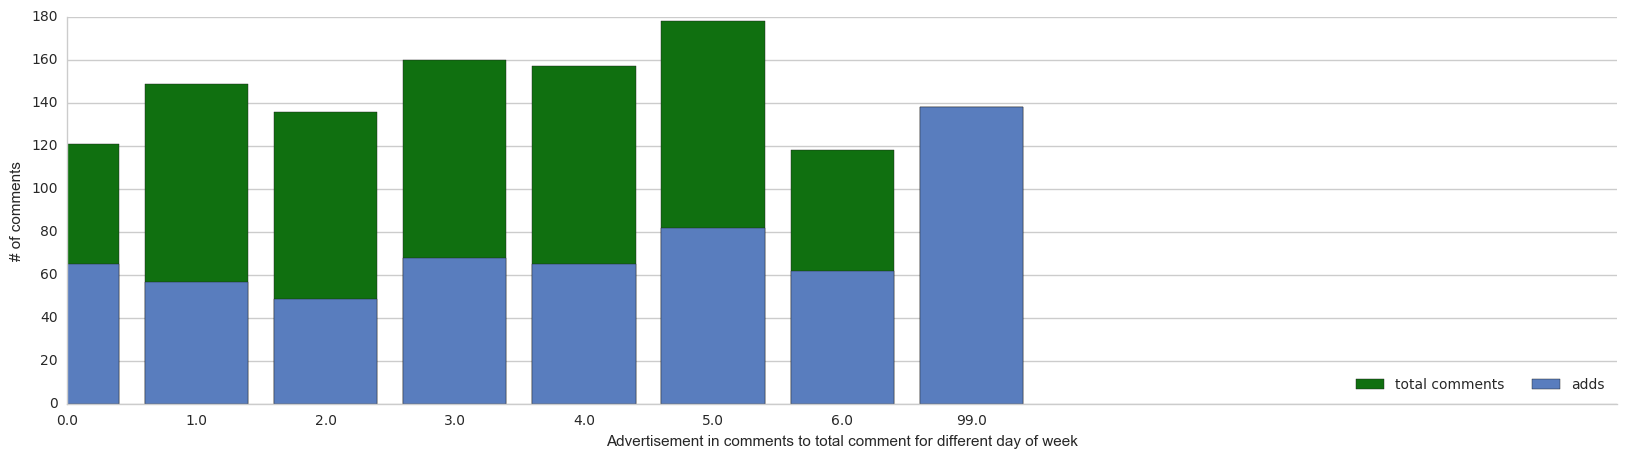

In [117]:
keys_total=time_df['day_of_week'].value_counts().keys()
values_total=time_df['day_of_week'].value_counts().values

f, ax = plt.subplots(figsize=(20, 5))

# Plot the total comments on a day
sns.set_color_codes("pastel")
sns.barplot(x=keys_total,y=values_total,color="green",label="total comments")

# plot the comments with advertisements on a day
keys_adds=time_df[time_df.target==1]['day_of_week'].value_counts().keys()
values_adds=time_df[time_df.target==1]['day_of_week'].value_counts().values

sns.set_color_codes("muted")
sns.barplot(x=keys_adds,y=values_adds,color="b",label="adds")

# Add a legend and informative axis label
ax.legend(ncol=2, loc="lower right")
ax.set(xlim=(0, 12), ylabel="# of comments",
       xlabel="Advertisement in comments to total comment for different day of week")
sns.despine(right=True, top=True)

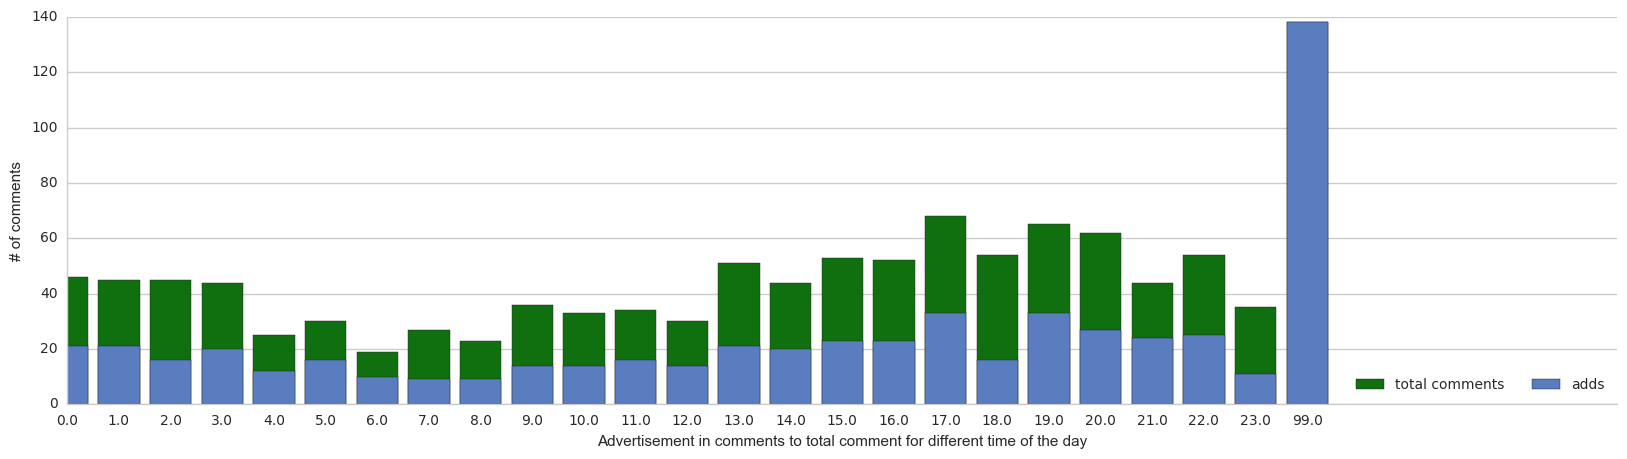

In [116]:
keys_total=time_df['time_of_day'].value_counts().keys()
values_total=time_df['time_of_day'].value_counts().values

f, ax = plt.subplots(figsize=(20, 5))

# Plot the total comments on a day
sns.set_color_codes("pastel")
sns.barplot(x=keys_total,y=values_total,color="green",label="total comments")

# plot the comments with advertisements on a day
keys_adds=time_df[time_df.target==1]['time_of_day'].value_counts().keys()
values_adds=time_df[time_df.target==1]['time_of_day'].value_counts().values

sns.set_color_codes("muted")
sns.barplot(x=keys_adds,y=values_adds,color="b",label="adds")

# Add a legend and informative axis label
ax.legend(ncol=2, loc="lower right")
ax.set(xlim=(0, 30), ylabel="# of comments",
       xlabel="Advertisement in comments to total comment for different time of the day")
sns.despine(right=True, top=True,left=False,bottom=False)

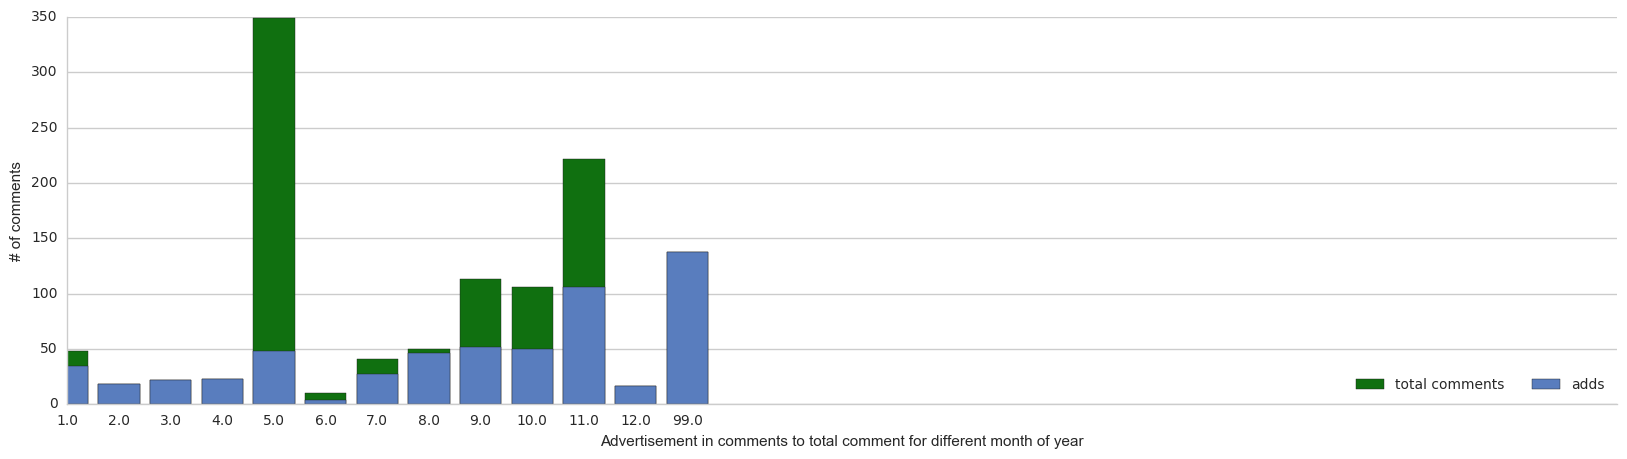

In [120]:
keys_total=time_df['month'].value_counts().keys()
values_total=time_df['month'].value_counts().values

f, ax = plt.subplots(figsize=(20, 5))

# Plot the total comments on a day
sns.set_color_codes("pastel")
sns.barplot(x=keys_total,y=values_total,color="green",label="total comments")

# plot the comments with advertisements on a day
keys_adds=time_df[time_df.target==1]['month'].value_counts().keys()
values_adds=time_df[time_df.target==1]['month'].value_counts().values

sns.set_color_codes("muted")
sns.barplot(x=keys_adds,y=values_adds,color="b",label="adds")

# Add a legend and informative axis label
ax.legend(ncol=2, loc="lower right")
ax.set(xlim=(0, 30), ylabel="# of comments",
       xlabel="Advertisement in comments to total comment for different month of year")
sns.despine(right=True, top=True,left=False,bottom=False)

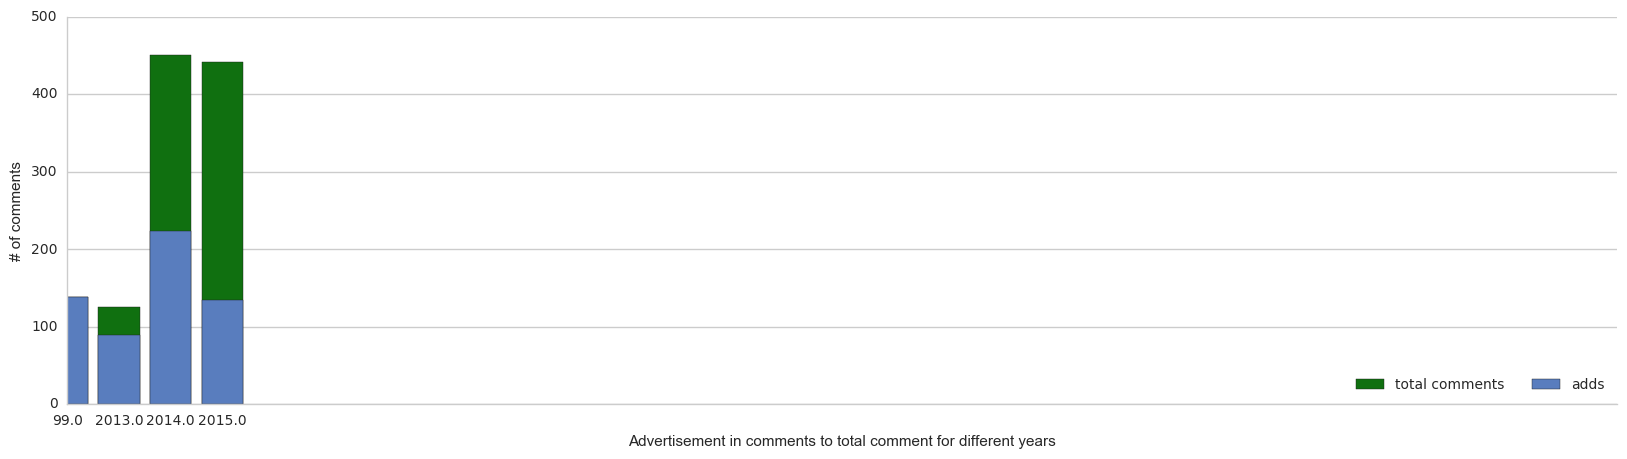

In [121]:
keys_total=time_df['year'].value_counts().keys()
values_total=time_df['year'].value_counts().values

f, ax = plt.subplots(figsize=(20, 5))

# Plot the total comments on a day
sns.set_color_codes("pastel")
sns.barplot(x=keys_total,y=values_total,color="green",label="total comments")

# plot the comments with advertisements on a day
keys_adds=time_df[time_df.target==1]['year'].value_counts().keys()
values_adds=time_df[time_df.target==1]['year'].value_counts().values

sns.set_color_codes("muted")
sns.barplot(x=keys_adds,y=values_adds,color="b",label="adds")

# Add a legend and informative axis label
ax.legend(ncol=2, loc="lower right")
ax.set(xlim=(0, 30), ylabel="# of comments",
       xlabel="Advertisement in comments to total comment for different years")
sns.despine(right=True, top=True,left=False,bottom=False)

In [123]:
time_df.to_excel("./time_df.xlsx")

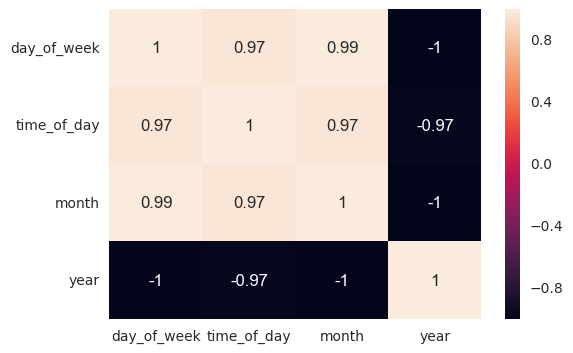

In [127]:
sns.heatmap(time_df[time_df.columns[:4]].corr(),annot=True)